In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tifffile as tif
import os

from cloudvolume import CloudVolume

%matplotlib inline

In [2]:
def get_coord(l):
    
    n = len(l)
    coord = np.zeros((n,3))
    for i in range(n):
        c_str = l[i]
        elem = c_str[1:-1].split(",")
        coord[i,0] = int(elem[0])
        coord[i,1] = int(elem[1])
        coord[i,2] = int(elem[2])
        
    return coord

## Import landmark coordinates

In [24]:
center_df = pd.read_csv("center.csv")
corner_df = pd.read_csv("corner.csv")
center_df

,Coordinate 1,Coordinate 2,Ellipsoid Dimensions,Tags,Description,Segment IDs,Parent ID,Type,ID
0,"(13163, 12460, 0)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
1,"(14135, 15514, 1)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
2,"(12471, 13040, 2)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
3,"(12543, 13719, 3)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
4,"(13463, 14372, 4)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
...,...,...,...,...,...,...,...,...,...
718,"(11487, 10885, 718)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
719,"(12363, 10392, 719)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
720,"(12490, 11115, 720)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN
721,"(12958, 10868, 721)",NaN,NaN,NaN,NaN,NaN,NaN,Point,NaN


In [25]:
ct_p = get_coord(center_df["Coordinate 1"])
cn_p = get_coord(corner_df["Coordinate 1"])

In [26]:
ref_ct = ct_p[np.where(ct_p[:,2]==344)][0,:2]
ref_cn = cn_p[np.where(ct_p[:,2]==344)][0,:2]
ref_v = ref_cn-ref_ct
ref_v = ref_v/np.sum(ref_v**2)**0.5

## Download downsampled sections

In [3]:
vol = CloudVolume("gs://zetta_jkim_001_drop/celegans_montage_unaligned", mip=4, parallel=True, progress=False)

In [22]:
output_d = "/Users/jabae/Documents/celegans_mip4"

i = 694
img = vol[:,:,i][:,:,0,0]
tif.imwrite(os.path.join(output_d, "z_{}.tif".format(i)), img)

In [31]:
output_d = "/Users/jabae/Documents/celegans_mip4"
for i in range(723):
    
    img = vol[:,:,i][:,:,0,0]
    tif.imwrite(os.path.join(output_d, "z_{}.tif".format(i)), img)

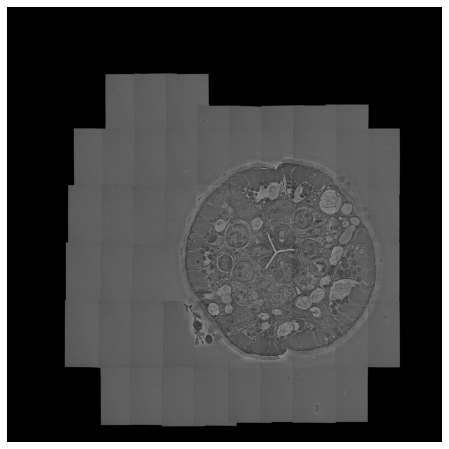

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

## Transform sample section

In [ ]:
vol = CloudVolume("gs://zetta_jkim_001_drop/celegans_montage_unaligned", parallel=True, progress=False)

In [54]:
z = 340
img = vol[:,:,z].reshape(25000,25000)

img_ct = ct_p[np.where(ct_p[:,2]==z)][0,:2]
img_cn = cn_p[np.where(cn_p[:,2]==z)][0,:2]

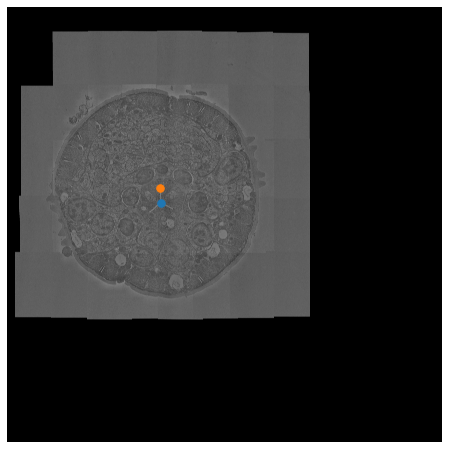

In [55]:
plt.figure(figsize=(8,8))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.plot(img_ct[1], img_ct[0], '.', markersize=15)
plt.plot(img_cn[1], img_cn[0], '.', markersize=15)
plt.axis("off")
plt.show()

In [56]:
img_ct

array([11274.,  8824.])

In [58]:
tr = img_ct - ref_ct
x_tr = int(tr[1])
y_tr = int(tr[0])

In [61]:
ref_ct

array([9244., 8724.])

In [62]:
tr = img_ct - ref_ct
x_tr = int(tr[1])
y_tr = int(tr[0])

img_new = np.zeros((25000,25000), dtype="uint8")
(h,w) = img.shape
if x_tr>=0 and y_tr>=0:
    img_new[:h-y_tr,:w-x_tr] = img[y_tr:,x_tr:]
elif x_tr>=0 and y_tr<0:
    img_new[y_tr:,:w-x_tr] = img[:h-y_tr,x_tr:]
elif x_tr<0 and y_tr>=0:
    img_new[:h-y-tr,x_tr:] = img[y_tr:,:w-x_tr]
else:
    img_new[y_tr:,x_tr:] = img[:h-y_tr,:w-x_tr]

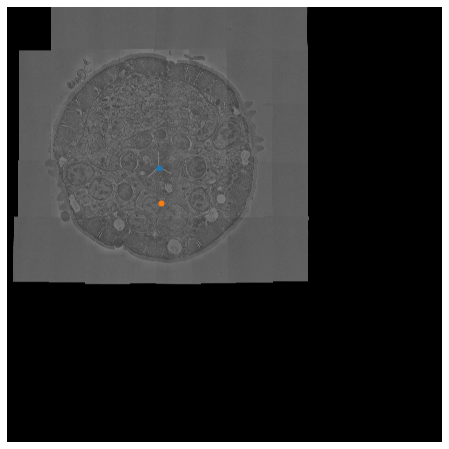

In [63]:
plt.figure(figsize=(8,8))
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)
plt.plot(ref_ct[1], ref_ct[0], '.', markersize=10)
plt.plot(img_ct[1], img_ct[0], '.', markersize=10)
plt.axis("off")
plt.show()

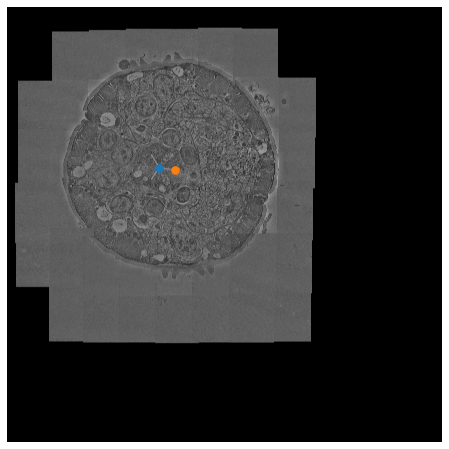

In [64]:
z = 344
img = vol[:,:,z].reshape(25000,25000)

img_ct = ct_p[np.where(ct_p[:,2]==z)][0,:2]
img_cn = cn_p[np.where(cn_p[:,2]==z)][0,:2]

plt.figure(figsize=(8,8))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.plot(img_ct[1], img_ct[0], '.', markersize=15)
plt.plot(img_cn[1], img_cn[0], '.', markersize=15)
plt.axis("off")
plt.show()

In [68]:
import math

In [69]:
def find_transform(v1, v2):
    
    return math.asin((v1[0]*v2[1]-v1[1]*v2[0])/np.sum(v1**2))

In [70]:
img_v = img_cn - img_ct
img_v = img_v/np.sum(img_v**2)**0.5
find_transform(img_v, ref_v)

-1.1661792788217538

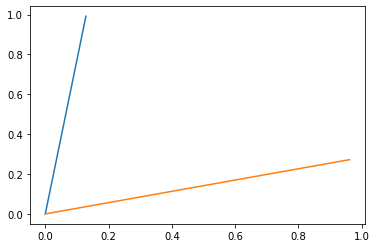

In [72]:
plt.figure()
plt.plot([0, img_v[0]],[0, img_v[1]])
plt.plot([0, ref_v[0]],[0, ref_v[1]])
plt.show()

In [78]:
from skimage.transform import rotate

In [88]:
z = 340
img = vol[:,:,z].reshape(25000,25000)

img_ct = ct_p[np.where(ct_p[:,2]==z)][0,:2]
img_cn = cn_p[np.where(cn_p[:,2]==z)][0,:2]

theta = find_transform(img_v,ref_v)
img_new = rotate(img,np.rad2deg(theta),center=(img_ct[1],img_ct[0]))

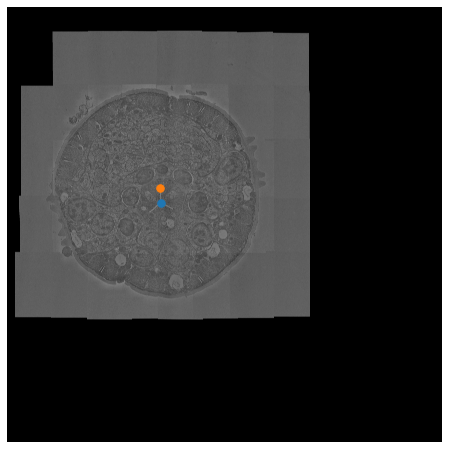

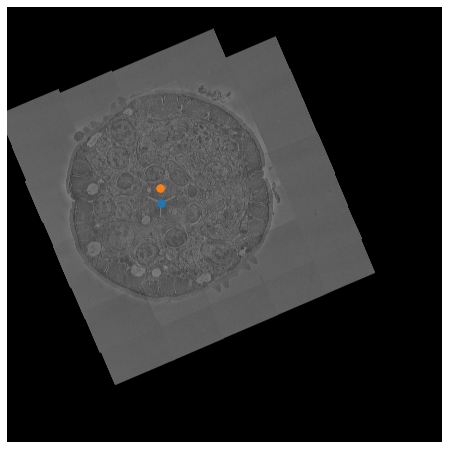

In [89]:
plt.figure(figsize=(8,8))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.plot(img_ct[1], img_ct[0], '.', markersize=15)
plt.plot(img_cn[1], img_cn[0], '.', markersize=15)
plt.axis("off")
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(img_new, cmap="gray", vmin=0, vmax=1)
plt.plot(img_ct[1], img_ct[0], '.', markersize=15)
plt.plot(img_cn[1], img_cn[0], '.', markersize=15)
plt.axis("off")
plt.show()